##### 감귤 데이터가 주어진 가운데 어떠한 것이 감귤데이터 착즙량에 영향을 주는지
##### 또 영향을 주는 요인들이 어떤 관계성을 갖는지
##### 결국 착즙량과 어떠한요인들이 어떻게 영향을 미치는지 알아보자

In [56]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
from pandas import DataFrame, MultiIndex, concat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 분산분석을 위한 라이브러리
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 사후분석을 위한 라이브러리
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

from math import sqrt
from scipy.stats import t
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency

# helper 참조
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from helper import normality_test, equal_variance_test, independence_test, all_test

In [57]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [58]:
print(data.head(10))
print(data.info())
# ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,2022-10-25 새순,2022-10-26 새순,2022-10-27 새순,2022-10-28 새순,2022-10-29 새순,2022-10-30 새순,2022-10-31 새순,2022-11-01 새순,2022-11-02 새순,2022-11-03 새순,2022-11-04 새순,2022-11-05 새순,2022-11-06 새순,2022-11-07 새순,2022-11-08 새순,2022-11-09 새순,2022-11-10 새순,2022-11-11 새순,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-16 새순,2022-11-17 새순,2022-11-18 새순,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,2022-09-11 엽록소,2022-09-12 엽록소,2022-09-13 엽록소,2022-09-14 엽록소,2022-09-15 엽록소,2022-09-16 엽록소,2022-09-17 엽록소,2022-09-18 엽록소,2022-09-19 엽록소,2022-09-20 엽록소,2022-09-21 엽록소,2022-09-22 엽록소,2022-09-23 엽록소,2022-09-24 엽록소,2022-09-25 엽록소,2022-09-26 엽록소,2022-09-27 엽록소,2022-09-28 엽록소,2022-09-29 엽록소,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소

           ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  2022-09-01 새순  \
0  TRAIN_0000       692  275.0      287.0      292.0  289.5            2.8   
1  TRAIN_0001       534  293.0      284.0      336.0  310.0            3.3   
2  TRAIN_0002       634  300.0      392.0      450.0  421.0            3.0   
3  TRAIN_0003       639  289.0      368.0      379.0  373.5            3.1   
4  TRAIN_0004       496  306.0      353.0      358.0  355.5            3.7   
5  TRAIN_0005       350  308.0      342.0      409.0  375.5            4.1   
6  TRAIN_0006       689  212.0      320.0      344.0  332.0            2.8   
7  TRAIN_0007       459  280.0      404.0      416.0  410.0            3.4   
8  TRAIN_0008       697  214.0      324.0      363.0  343.5            2.8   
9  TRAIN_0009       167  224.0      242.0      285.0  263.5            4.8   

   2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  ...  2022-11-19 엽록소  \
0            2.8            2.7            2.7  ...       70.978249   

In [59]:
data.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


In [88]:
# 유형별 변수 정리
y_var = ['착과량(int)'] # = target
id_var = list(data.columns[2:6]) # '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균'
saesoon = list(data.columns[6:95]) # 각날짜별 새순데이터
yuprokso = list(data.columns[95:]) # 각날짜별 엽록소데이터

In [89]:
# 칼럼의 수가 너무 많아서 줄이기 위해 비슷한 것들끼리 묶기
# 위의 데이터를 보니 2022-09-01 새순,2022-09-02 새순
# 날짜 뒤에 띄어쓰기가 있고 그 뒤에 알고자하는 새순, 엽록소 등으로 나타나는 것을 알 수 있음
# 그래서 split하여 type과 날짜를 따로 뽑아낼 것
train_melt = data.melt(id_vars=['ID']+y_var+id_var, value_vars=saesoon+yuprokso)
train_melt['date'] = train_melt['variable'].apply(lambda x: x.split(' ')[0])
train_melt['type'] = train_melt['variable'].apply(lambda x: x.split(' ')[1])
print(train_melt)

                ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  \
0       TRAIN_0000       692  275.0      287.0      292.0  289.5   
1       TRAIN_0001       534  293.0      284.0      336.0  310.0   
2       TRAIN_0002       634  300.0      392.0      450.0  421.0   
3       TRAIN_0003       639  289.0      368.0      379.0  373.5   
4       TRAIN_0004       496  306.0      353.0      358.0  355.5   
...            ...       ...    ...        ...        ...    ...   
392841  TRAIN_2202       119  230.0      353.0      367.0  360.0   
392842  TRAIN_2203       611  266.0      337.0      400.0  368.5   
392843  TRAIN_2204       650  237.0      353.0      362.0  357.5   
392844  TRAIN_2205       363  281.0      337.0      403.0  370.0   
392845  TRAIN_2206        17  228.0      389.0      398.0  393.5   

              variable      value        date type  
0        2022-09-01 새순   2.800000  2022-09-01   새순  
1        2022-09-01 새순   3.300000  2022-09-01   새순  
2        2022-09-01 새순  

In [62]:
train_melt_preproc = train_melt[['ID']+y_var+id_var+['date']].drop_duplicates().reset_index(drop=True).merge(
    train_melt[train_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    train_melt[(train_melt['type']=='새순')&(train_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    train_melt[(train_melt['type']=='새순')&(train_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    train_melt[train_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)
train_melt_preproc['새순diff0'] = train_melt_preproc['새순']-train_melt_preproc['새순0']
train_melt_preproc['새순diff1'] = train_melt_preproc['새순']-train_melt_preproc['새순1']
train_melt_preproc['엽록소_새순'] = train_melt_preproc['엽록소']/(train_melt_preproc['새순']+0.1)  # 분모 0 방지
df = train_melt_preproc.copy()

In [63]:
print(df)

                ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균        date  \
0       TRAIN_0000       692  275.0      287.0      292.0  289.5  2022-09-01   
1       TRAIN_0001       534  293.0      284.0      336.0  310.0  2022-09-01   
2       TRAIN_0002       634  300.0      392.0      450.0  421.0  2022-09-01   
3       TRAIN_0003       639  289.0      368.0      379.0  373.5  2022-09-01   
4       TRAIN_0004       496  306.0      353.0      358.0  355.5  2022-09-01   
...            ...       ...    ...        ...        ...    ...         ...   
196418  TRAIN_2202       119  230.0      353.0      367.0  360.0  2022-11-28   
196419  TRAIN_2203       611  266.0      337.0      400.0  368.5  2022-11-28   
196420  TRAIN_2204       650  237.0      353.0      362.0  357.5  2022-11-28   
196421  TRAIN_2205       363  281.0      337.0      403.0  370.0  2022-11-28   
196422  TRAIN_2206        17  228.0      389.0      398.0  393.5  2022-11-28   

         새순  새순0  새순1        엽록소  새순dif

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196423 entries, 0 to 196422
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         196423 non-null  object 
 1   착과량(int)   196423 non-null  int64  
 2   수고(m)      196423 non-null  float64
 3   수관폭1(min)  196423 non-null  float64
 4   수관폭2(max)  196423 non-null  float64
 5   수관폭평균      196423 non-null  float64
 6   date       196423 non-null  object 
 7   새순         196423 non-null  float64
 8   새순0        196423 non-null  float64
 9   새순1        196423 non-null  float64
 10  엽록소        196423 non-null  float64
 11  새순diff0    196423 non-null  float64
 12  새순diff1    196423 non-null  float64
 13  엽록소_새순     196423 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 21.0+ MB


In [65]:
df = df.drop(['ID', 'date','새순diff0', '새순diff1'], axis=1)

In [66]:
df.columns = ['extraction_rate', 'height', 'area1','area2','areamean','sprout1','sprout2','sprout3', 'chlorophyll', 'chlorophyll_sprout']

In [67]:
df

,extraction_rate,height,area1,area2,areamean,sprout1,sprout2,sprout3,chlorophyll,chlorophyll_sprout
0,692,275.0,287.0,292.0,289.5,2.8,2.8,1.7,78.336504,27.012587
1,534,293.0,284.0,336.0,310.0,3.3,3.3,1.9,80.116691,23.563733
2,634,300.0,392.0,450.0,421.0,3.0,3.0,1.8,79.118529,25.522106
3,639,289.0,368.0,379.0,373.5,3.1,3.1,1.9,77.936262,24.355082
4,496,306.0,353.0,358.0,355.5,3.7,3.7,2.1,76.233231,20.061377
...,...,...,...,...,...,...,...,...,...,...
196418,119,230.0,353.0,367.0,360.0,0.0,4.7,2.5,65.560547,655.605473
196419,611,266.0,337.0,400.0,368.5,0.6,3.1,1.9,72.944396,104.206281
196420,650,237.0,353.0,362.0,357.5,0.5,3.0,1.8,66.479459,110.799099
196421,363,281.0,337.0,403.0,370.0,0.0,3.9,2.2,65.812084,658.120840


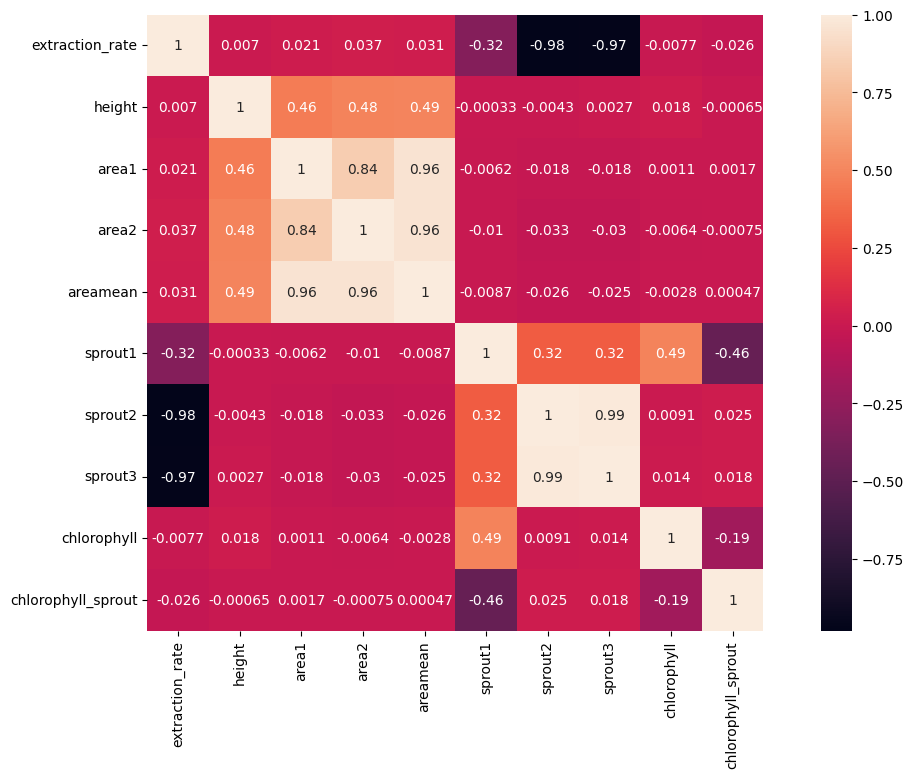

In [68]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [82]:
model = ols('extraction_rate ~ C(sprout2) * C(sprout3)', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(sprout2),30.0,9.126067e+09,3.042022e+08,211266.565106,0.000000e+00
C(sprout3),15.0,1.851982e+06,1.234655e+05,85.745994,3.854517e-264
C(sprout2):C(sprout3),450.0,4.699739e+06,1.044387e+04,7.253200,0.000000e+00
Residual,196340.0,2.827095e+08,1.439898e+03,NaN,NaN


##### 결과해석
|요인|분석모델|결과|
|--|--|--|
|sprout2|$F(30,196340) = 211266, p < 0.05$|sprout2의 수준에 따라 평균에 차이가 난다고 볼 수 있음|
|sprout3|$F(15,196340) = 85.74, p < 0.05$|sprout3의 수준에 따라 평균에 차이가 난다고 볼 수 있음|
|sprout2:sprout3|$F(450,196340) = 7.253, p < 0.05$|유의미함, 새순2와 새순3은 연관이있음|

In [84]:
# model = ols('extraction_rate ~ C(area2) * C(area1)', data=df).fit()
# anova_lm(model)
# 메모리 부족으로 계산 불가

In [74]:
comp = MultiComparison(data=df['extraction_rate'], groups=df['sprout2'])
result = comp.allpairtest(ttest_ind, method='bonf')
# result[0]

##### 결과해설
###### true : 차이가 유의미함 취해야함 대부분의 경우 이에 해당 되나
###### 새순2번의 (5.2 5.3)/(4.6	4.7)/(3.6 3.7) cm간의 차이는 존재하지 않음
###### 즉, 대부분의 경우 새순2번의 경우 착즙량과 의미가 깊다는 것을 알 수 있음

In [76]:
comp = MultiComparison(data=df['extraction_rate'], groups=df['sprout3'])
result = comp.allpairtest(ttest_ind, method='bonf')
# result[0]

##### 결과해설
###### true : 차이가 유의미함 취해야함 대부분의 경우 이에 해당 되나
###### 새순3번의 (2.8 2.9)/(1.4 1.5)/(1.4 1.6) cm간의 차이는 존재하지 않음
###### 즉, 대부분의 경우 새순3번의 경우 착즙량과 의미가 깊다는 것을 알 수 있음

In [78]:
hsd = pairwise_tukeyhsd(df['extraction_rate'], df['sprout2'], alpha=0.05)
# hsd.summary()

##### 결과해설
###### true : 차이가 유의미함 취해야함 대부분의 경우 이에 해당 되나
###### 새순2번의 (5.2 5.3)/(4.6	4.7)/(3.6 3.7) cm간의 차이는 존재하지 않음
###### 즉, 대부분의 경우 새순2번의 경우 착즙량과 의미가 깊다는 것을 알 수 있음

In [79]:
hsd = pairwise_tukeyhsd(df['extraction_rate'], df['sprout3'], alpha=0.05)
# hsd.summary()

##### 결과해설
###### true : 차이가 유의미함 취해야함 대부분의 경우 이에 해당 되나
###### 새순3번의 (2.8 2.9)/(1.4 1.5)/(1.4 1.6) cm간의 차이는 존재하지 않음
###### 즉, 대부분의 경우 새순3번의 경우 착즙량과 의미가 깊다는 것을 알 수 있음